#  PATEL SMITKUMAR KAUSHIKKUMAR (CIN 306587208)

#  CS 4661: Introduction to Data Science     

#   Homework_5

> ## Question1: Handwriting Recognition using Machine Learning!

### a
### Download the dataset “Digit” from CSNS. Check out the dataset. It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download the corresponding csv file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits!
### Import the following two libraries to work with images:
- import matplotlib.image as mpimg
- import matplotlib.pyplot as plt
###  you can use:
- mpimg.imread(file_name) to load an image, and
- plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest') to show an image.
- Add %matplotlib inline at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [56]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

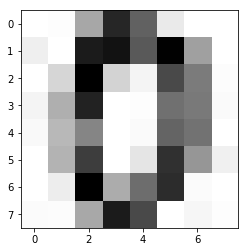

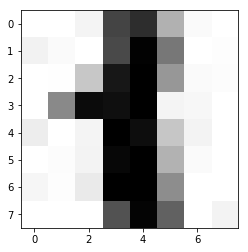

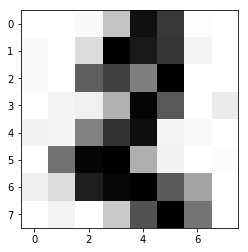

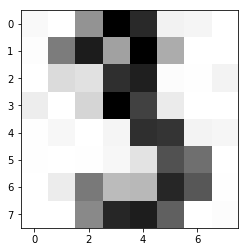

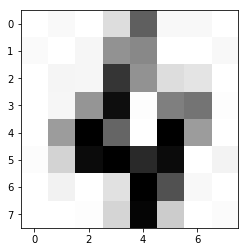

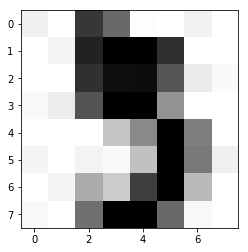

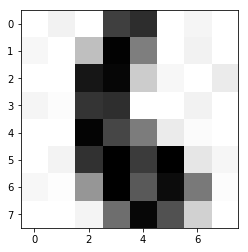

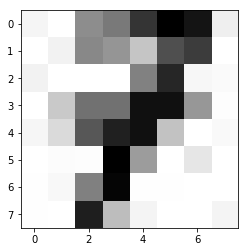

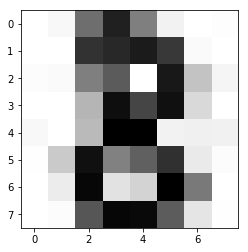

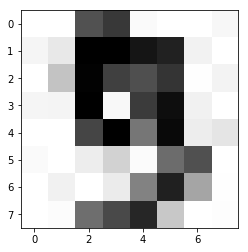

In [57]:
for file in range(0,10):
    img=mpimg.imread(r"S:/MASTERS/SEMESTER_4/CS_4661/HomeWork/Homework_5/Digit/"+ str(file)+".jpg") #to load an image
    plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest') 
    plt.show()

### b-
### Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.

In [58]:
N = 1797 
feature_matrix = np.zeros((N, 64))

for i in range(N):
    images=mpimg.imread(r"S:/MASTERS/SEMESTER_4/CS_4661/HomeWork/Homework_5/Digit/"+ str(i)+".jpg")
    feature = images.reshape(64)
    feature_matrix[i] = np.copy(feature)
    
feature_matrix

array([[  0.,   2.,  88., ...,   0.,   9.,   2.],
       [  0.,   0.,  11., ..., 157.,   0.,  12.],
       [  0.,   0.,   5., ..., 255., 138.,   0.],
       ...,
       [  5.,   0.,  22., ...,  87.,  21.,   0.],
       [  7.,   0.,  22., ..., 196.,   0.,   7.],
       [  0.,  17., 155., ..., 198.,  26.,   0.]])

In [59]:
label=pd.read_csv(r"S:\MASTERS\SEMESTER_4\CS_4661\HomeWork\Homework_5\label.csv")
label.head()

,name of the file,digitlabel
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [60]:
label_vector=label["digitlabel"]
label_vector.head()

0    0
1    1
2    2
3    3
4    4
Name: digitlabel, dtype: int64

In [61]:
feature_mat=pd.DataFrame(feature_matrix)
feature_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,2.0,88.0,217.0,158.0,21.0,0.0,0.0,16.0,0.0,...,4.0,0.0,4.0,3.0,87.0,228.0,182.0,0.0,9.0,2.0
1,0.0,0.0,11.0,187.0,210.0,78.0,5.0,0.0,13.0,5.0,...,0.0,0.0,0.0,0.0,0.0,172.0,251.0,157.0,0.0,12.0
2,0.0,0.0,5.0,59.0,240.0,199.0,2.0,0.0,5.0,0.0,...,92.0,0.0,0.0,11.0,0.0,54.0,173.0,255.0,138.0,0.0
3,6.0,0.0,108.0,255.0,213.0,13.0,10.0,0.0,2.0,131.0,...,168.0,1.0,0.0,0.0,118.0,217.0,226.0,159.0,0.0,3.0
4,0.0,6.0,0.0,34.0,160.0,7.0,7.0,0.0,5.0,0.0,...,7.0,0.0,0.0,0.0,2.0,42.0,250.0,51.0,0.0,4.0


### c- 
### Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

In [65]:
X_train,X_test,y_train,y_test = train_test_split(feature_mat,label,test_size=0.1,random_state=2)



In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1617, 64)
(180, 64)
(1617, 2)
(180, 2)


### d
### Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:

- #### from sklearn.ensemble import RandomForestClassifier
- #### my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

### Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

In [63]:
my_RandomForest =RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [64]:
y_predict_rf= my_RandomForest.predict(X_test)
y_predict_rf

array([[2.250e+02, 4.000e+00],
       [2.520e+02, 0.000e+00],
       [2.900e+01, 9.000e+00],
       [1.107e+03, 1.000e+00],
       [1.270e+02, 8.000e+00],
       [6.630e+02, 7.000e+00],
       [1.426e+03, 1.000e+00],
       [2.890e+02, 5.000e+00],
       [1.590e+03, 1.000e+00],
       [5.740e+02, 6.000e+00],
       [9.680e+02, 6.000e+00],
       [1.150e+02, 7.000e+00],
       [1.345e+03, 6.000e+00],
       [9.260e+02, 1.000e+00],
       [1.404e+03, 5.000e+00],
       [3.270e+02, 5.000e+00],
       [4.300e+02, 8.000e+00],
       [8.340e+02, 6.000e+00],
       [4.400e+02, 2.000e+00],
       [1.700e+01, 7.000e+00],
       [4.100e+01, 4.000e+00],
       [1.701e+03, 6.000e+00],
       [1.240e+02, 4.000e+00],
       [5.270e+02, 1.000e+00],
       [5.870e+02, 5.000e+00],
       [5.280e+02, 2.000e+00],
       [9.750e+02, 9.000e+00],
       [1.090e+02, 5.000e+00],
       [1.411e+03, 4.000e+00],
       [1.353e+03, 6.000e+00],
       [2.710e+02, 5.000e+00],
       [1.950e+02, 6.000e+00],
       [

In [55]:
accuracy =accuracy_score(y_test,y_predict)
print(accuracy)
# print("RandomForest :",accuracy)
# y_test.size
# print(y_test)
# print(y_predict)

ValueError: multiclass-multioutput is not supported

### e- 
### Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:
- ### plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')


In [ ]:
y_test = np.asarray(y_test)
misclassified = np.where(y_test != y_predict_rf)
misclassified[0]


In [ ]:
for i in misclassified[0]:

    # get the current image and convert to feature, as above
    print(y_predict_rf[index])
    images=mpimg.imread("S:/MASTERS/SEMESTER_4/CS_4661/HomeWork/Homework_5/Digit/"+ str(i)+".jpg")
    plt.imshow(images,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()